# Long to Wide DataFrame Transformation Lab

## intro and objectives

### 0. Load required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Let's load some data

### 1.1. COVID-19.

### In the covid19_cases.csv file, we have an export from the daily number of new reported cases of COVID-19 by country worldwide dataset provided by the European Centre for Disease Prevention and Control (ECDC), which can be found at https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide.
### For scripted or automated collection of this data, the ECDC makes the current day's CSV file available via https://opendata.ecdc.europa.eu/covid19/casedistribution/csv. T
### The snapshot we will be using was collected on September 19, 2020 and contains the number of new COVID-19 cases per country from December 31, 2019 through September 18, 2020, with partial data for September 19, 2020. For this chapter, we will look at the 8-month span from January 18, 2020 through September 18, 2020.

In [9]:
covidLongFormatDataFrame = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/Python4DS-II/main/datasets/covid19_cases.csv')




In [10]:
covidLongFormatDataFrame

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159
...,...,...,...,...,...,...,...,...,...,...,...,...
43713,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43714,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43715,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43716,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [11]:
covidLongFormatDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     43718 non-null  object 
 1   day                                                         43718 non-null  int64  
 2   month                                                       43718 non-null  int64  
 3   year                                                        43718 non-null  int64  
 4   cases                                                       43718 non-null  int64  
 5   deaths                                                      43718 non-null  int64  
 6   countriesAndTerritories                                     43718 non-null  object 
 7   geoId                                                       43529 non-null  object 
 

## 2. Long format

#### The previous COVID-19 DataFrame is presented in the so-called long format, it is also known as tidy format.
#### Long format DataFrames are quite convenient as it allows to keep all relevant information in a single DataFrame. Moreover long formats are computationally convenient as it facilitates vectorized operations (fast processing)
#### In long format DataFrames:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table

#### In the case of our COVID-19 DataFrame
<img src="https://github.com/thousandoaks/Python4DS102/blob/main/images/longformatDataFrame.png?raw=1" width="500" height="600">


### 2.1. Groupby Operations
#### In Long format contexts it is straighforward to implement groupby operations

In [16]:
covidLongFormatDataFrame.groupby('continentExp')[['cases','deaths']].mean()

,cases,deaths
continentExp,,
Africa,135.717589,3.279973
America,1627.831408,55.515126
Asia,934.695692,17.558203
Europe,356.694989,17.449245
Oceania,19.982010,0.563275
Other,10.875000,0.109375


In [17]:
covidLongFormatDataFrame.groupby('countriesAndTerritories')[['cases','deaths']].mean()

,cases,deaths
countriesAndTerritories,,
Afghanistan,153.224409,5.657480
Albania,61.912821,1.810256
Algeria,190.783784,6.405405
Andorra,8.231579,0.278947
Angola,20.818681,0.791209
...,...,...
Vietnam,4.107692,0.134615
Western_Sahara,5.210884,0.006803
Yemen,12.417178,3.588957


In [18]:
covidLongFormatDataFrame.sample(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
8069,13/07/2020,13,7,2020,0,0,Central_African_Republic,CF,CAF,4745179.0,Africa,18.102584
32939,18/03/2020,18,3,2020,3,0,Qatar,QA,QAT,2832071.0,Asia,15.606953
13669,31/07/2020,31,7,2020,0,0,Falkland_Islands_(Malvinas),FK,FLK,3372.0,America,0.000000


In [19]:
pd.set_option('display.max_rows', 100)
covidLongFormatDataFrame[['month','year','cases','deaths','countriesAndTerritories']].groupby(['year','month','countriesAndTerritories']).max()

cases  deaths
year month countriesAndTerritories               
2019 12    Afghanistan                  0       0
           Algeria                      0       0
           Armenia                      0       0
           Australia                    0       0
           Austria                      0       0
...                                   ...     ...
2020 9     Vietnam                      5       2
           Western_Sahara               0       0
           Yemen                       14       4
           Zambia                     284       8
           Zimbabwe                   321       8

[1649 rows x 2 columns]

### 2.2. Apply Operations
#### In Long format contexts it is also straighforward to implement apply operations

In [20]:
covidLongFormatDataFrame.sample(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2548,22/02/2020,22,2,2020,0,0,Austria,AT,AUT,8858775.0,Europe,0.000000
34540,18/09/2020,18,9,2020,0,0,Sao_Tome_and_Principe,ST,STP,215048.0,Africa,4.650125
33094,01/07/2020,1,7,2020,388,17,Romania,RO,ROU,19414458.0,Europe,23.461896


In [21]:
### for instance we can compute the logarithm of cases
covidLongFormatDataFrame['casesLogScaled']=covidLongFormatDataFrame['cases'].apply(lambda x:np.log(x))

In [ ]:
covidLongFormatDataFrame.sample(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,casesLogScaled
42782,17/09/2020,17,9,2020,0,0,Vietnam,VN,VNM,96462108.0,Asia,0.017624,-inf
5912,20/01/2020,20,1,2020,0,0,Brazil,BR,BRA,211049519.0,America,0.000000,-inf
7097,17/01/2020,17,1,2020,0,0,Cambodia,KH,KHM,16486542.0,Asia,0.000000,-inf


## 3. Wide format
### In spite of the advantages of the long format, some operations expect dataframes in the so called wide format.
### This is the case with statistical analysis, machine learning and some visualizations.

### In the case of COVID-19, the wideformat counterpart is:

<img src="https://github.com/thousandoaks/Python4DS102/blob/main/images/wideformatdataframe.png?raw=1" width="500" height="600">


### 3.1. Long to Wide transformation. PIVOT Operation
#### Pandas provides the method "pivot" to tranform DataFrames from long form to wide equivalent.

In [22]:
covidLongFormatDataFrame.head(3)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,casesLogScaled
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645,3.850148
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,-inf
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,2.833213


In [24]:
covingCasesWideFormatDataFrame=covidLongFormatDataFrame.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
covingCasesWideFormatDataFrame

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
01/01/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/02/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/03/2020,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/04/2020,25.0,20.0,132.0,6.0,0.0,0.0,0.0,0.0,39.0,5.0,...,0.0,24998.0,6.0,24.0,0.0,6.0,NaN,NaN,0.0,1.0
01/05/2020,222.0,7.0,158.0,2.0,0.0,0.0,0.0,143.0,82.0,0.0,...,0.0,29917.0,13.0,44.0,2.0,0.0,0.0,0.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/03/2020,27.0,11.0,73.0,36.0,0.0,0.0,0.0,146.0,50.0,NaN,...,NaN,21595.0,29.0,4.0,16.0,3.0,NaN,NaN,6.0,0.0
31/05/2020,866.0,23.0,133.0,0.0,7.0,0.0,0.0,795.0,355.0,0.0,...,0.0,23297.0,5.0,41.0,90.0,0.0,0.0,23.0,0.0,14.0
31/07/2020,71.0,92.0,602.0,4.0,78.0,0.0,0.0,5641.0,354.0,1.0,...,0.0,68032.0,6.0,686.0,1288.0,50.0,0.0,15.0,306.0,213.0


In [25]:
covingDeathsWideFormatDataFrame=covidLongFormatDataFrame.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')

In [26]:
covingDeathsWideFormatDataFrame

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
01/01/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/02/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/03/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/04/2020,0.0,3.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,909.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
01/05/2020,4.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,0.0,2040.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/03/2020,0.0,2.0,4.0,2.0,0.0,0.0,0.0,4.0,0.0,NaN,...,NaN,661.0,0.0,1.0,2.0,0.0,NaN,NaN,0.0,0.0
31/05/2020,3.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,...,0.0,945.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
31/07/2020,0.0,4.0,14.0,0.0,1.0,0.0,0.0,111.0,10.0,0.0,...,0.0,1357.0,0.0,5.0,7.0,0.0,0.0,2.0,3.0,12.0


### 3.2. Long to Wide transformation. UNSTACK Operation
#### Pandas provides the method "unstack" to tranform MultiIndex DataFrames from long form to wide equivalents.

#### 3.2.1. First we need to transform it onto a MultiIndex DataFrame

In [27]:
covidLongFormatDataFrameMultiIndex=covidLongFormatDataFrame.set_index(['countriesAndTerritories', 'dateRep'])

In [28]:
covidLongFormatDataFrameMultiIndex

day  month  year  cases  deaths geoId  \
countriesAndTerritories dateRep                                             
Afghanistan             19/09/2020   19      9  2020     47       1    AF   
                        18/09/2020   18      9  2020      0       0    AF   
                        17/09/2020   17      9  2020     17       0    AF   
                        16/09/2020   16      9  2020     40      10    AF   
                        15/09/2020   15      9  2020     99       6    AF   
...                                 ...    ...   ...    ...     ...   ...   
Zimbabwe                25/03/2020   25      3  2020      0       0    ZW   
                        24/03/2020   24      3  2020      0       1    ZW   
                        23/03/2020   23      3  2020      0       0    ZW   
                        22/03/2020   22      3  2020      1       0    ZW   
                        21/03/2020   21      3  2020      1       0    ZW   

                                   countryterritoryCode  popData2019  \
countriesAndTerritories dateRep                                        
Afghanistan             19/09/2020                  AFG   38041757.0   
                        18/09/2020                  AFG   38041757.0   
                        17/09/2020                  AFG   38041757.0   
                        16/09/2020                  AFG   38041757.0   
                        15/09/2020                  AFG   38041757.0   
...                                                 ...          ...   
Zimbabwe                25/03/2020                  ZWE   14645473.0   
                        24/03/2020                  ZWE   14645473.0   
                        23/03/2020                  ZWE   14645473.0   
                        22/03/2020                  ZWE   14645473.0   
                        21/03/2020                  ZWE   14645473.0   

                                   continentExp  \
countriesAndTerritories dateRep                   
Afghanistan             19/09/2020         Asia   
                        18/09/2020         Asia   
                        17/09/2020         Asia   
                        16/09/2020         Asia   
                        15/09/2020         Asia   
...                                         ...   
Zimbabwe                25/03/2020       Africa   
                        24/03/2020       Africa   
                        23/03/2020       Africa   
                        22/03/2020       Africa   
                        21/03/2020       Africa   

                                    Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
countriesAndTerritories dateRep                                                                  
Afghanistan             19/09/2020                                           1.616645            
                        18/09/2020                                           1.535155            
                        17/09/2020                                           1.653446            
                        16/09/2020                                           1.708649            
                        15/09/2020                                           1.627159            
...                                                                               ...            
Zimbabwe                25/03/2020                                                NaN            
                        24/03/2020                                                NaN            
                        23/03/2020                                                NaN            
                        22/03/2020                                                NaN            
                        21/03/2020                                                NaN            

                                    casesLogScaled  
countriesAndTerritories dateRep                     
Afghanistan             19/09/2020        3.850148  

#### 3.2.2. Then we have it unstacked
#### Don't forget that we are dealing with a MultiIndex DataFrame !

In [29]:
covingWideFormatDataFrameMultiIndex=covidLongFormatDataFrameMultiIndex[['cases','deaths']].unstack('countriesAndTerritories')

In [30]:
covingWideFormatDataFrameMultiIndex

cases                                          \
countriesAndTerritories Afghanistan Albania Algeria Andorra Angola Anguilla   
dateRep                                                                       
01/01/2020                      0.0     NaN     0.0     NaN    NaN      NaN   
01/02/2020                      0.0     NaN     0.0     NaN    NaN      NaN   
01/03/2020                      0.0     NaN     2.0     NaN    NaN      NaN   
01/04/2020                     25.0    20.0   132.0     6.0    0.0      0.0   
01/05/2020                    222.0     7.0   158.0     2.0    0.0      0.0   
...                             ...     ...     ...     ...    ...      ...   
31/03/2020                     27.0    11.0    73.0    36.0    0.0      0.0   
31/05/2020                    866.0    23.0   133.0     0.0    7.0      0.0   
31/07/2020                     71.0    92.0   602.0     4.0   78.0      0.0   
31/08/2020                     19.0   101.0   364.0     0.0   73.0      0.0   
31/12/2019                      0.0     NaN     0.0     NaN    NaN      NaN   

                                                                     ...  \
countriesAndTerritories Antigua_and_Barbuda Argentina Armenia Aruba  ...   
dateRep                                                              ...   
01/01/2020                              NaN       NaN     0.0   NaN  ...   
01/02/2020                              NaN       NaN     0.0   NaN  ...   
01/03/2020                              NaN       NaN     1.0   NaN  ...   
01/04/2020                              0.0       0.0    39.0   5.0  ...   
01/05/2020                              0.0     143.0    82.0   0.0  ...   
...                                     ...       ...     ...   ...  ...   
31/03/2020                              0.0     146.0    50.0   NaN  ...   
31/05/2020                              0.0     795.0   355.0   0.0  ...   
31/07/2020                              0.0    5641.0   354.0   1.0  ...   
31/08/2020                              0.0    9217.0   124.0  22.0  ...   
31/12/2019                              NaN       NaN     0.0   NaN  ...   

                                              deaths                           \
countriesAndTerritories United_States_Virgin_Islands United_States_of_America   
dateRep                                                                         
01/01/2020                                       NaN                      0.0   
01/02/2020                                       NaN                      0.0   
01/03/2020                                       NaN                      1.0   
01/04/2020                                       0.0                    909.0   
01/05/2020                                       0.0                   2040.0   
...                                              ...                      ...   
31/03/2020                                       NaN                    661.0   
31/05/2020                                       0.0                    945.0   
31/07/2020                                       0.0                   1357.0   
31/08/2020                                       0.0                    290.0   
31/12/2019                                       NaN                      0.0   

                                                                             \
countriesAndTerritories Uruguay Uzbekistan Venezuela Vietnam Western_Sahara   
dateRep                                                                       
01/01/2020                  NaN        NaN       NaN     0.0            NaN   
01/02/2020                  NaN        NaN       NaN     0.0            NaN   
01/03/2020                  NaN        NaN       NaN     0.0            NaN   
01/04/2020                  0.0        0.0       0.0     0.0            NaN   
01/05/2020                  2.0        0.0       0.0     0.0            0.0   
...                         ...        ...       ...     ...            ...   
31/03/2020  

In [ ]:
covingWideFormatDataFrameMultiIndex['cases']

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
01/01/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/02/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/03/2020,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/04/2020,25.0,20.0,132.0,6.0,0.0,0.0,0.0,0.0,39.0,5.0,...,0.0,24998.0,6.0,24.0,0.0,6.0,NaN,NaN,0.0,1.0
01/05/2020,222.0,7.0,158.0,2.0,0.0,0.0,0.0,143.0,82.0,0.0,...,0.0,29917.0,13.0,44.0,2.0,0.0,0.0,0.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/03/2020,27.0,11.0,73.0,36.0,0.0,0.0,0.0,146.0,50.0,NaN,...,NaN,21595.0,29.0,4.0,16.0,3.0,NaN,NaN,6.0,0.0
31/05/2020,866.0,23.0,133.0,0.0,7.0,0.0,0.0,795.0,355.0,0.0,...,0.0,23297.0,5.0,41.0,90.0,0.0,0.0,23.0,0.0,14.0
31/07/2020,71.0,92.0,602.0,4.0,78.0,0.0,0.0,5641.0,354.0,1.0,...,0.0,68032.0,6.0,686.0,1288.0,50.0,0.0,15.0,306.0,213.0


In [ ]:
covingWideFormatDataFrameMultiIndex['cases']['Albania']

dateRep
01/01/2020      NaN
01/02/2020      NaN
01/03/2020      NaN
01/04/2020     20.0
01/05/2020      7.0
              ...  
31/03/2020     11.0
31/05/2020     23.0
31/07/2020     92.0
31/08/2020    101.0
31/12/2019      NaN
Name: Albania, Length: 264, dtype: float64

In [ ]:
covingWideFormatDataFrameMultiIndex['cases','Albania']

dateRep
01/01/2020      NaN
01/02/2020      NaN
01/03/2020      NaN
01/04/2020     20.0
01/05/2020      7.0
              ...  
31/03/2020     11.0
31/05/2020     23.0
31/07/2020     92.0
31/08/2020    101.0
31/12/2019      NaN
Name: (cases, Albania), Length: 264, dtype: float64

In [ ]:
covingWideFormatDataFrameMultiIndex['deaths']

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
01/01/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/02/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/03/2020,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
01/04/2020,0.0,3.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,909.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
01/05/2020,4.0,0.0,6.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,0.0,2040.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/03/2020,0.0,2.0,4.0,2.0,0.0,0.0,0.0,4.0,0.0,NaN,...,NaN,661.0,0.0,1.0,2.0,0.0,NaN,NaN,0.0,0.0
31/05/2020,3.0,0.0,8.0,0.0,0.0,0.0,0.0,8.0,4.0,0.0,...,0.0,945.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0
31/07/2020,0.0,4.0,14.0,0.0,1.0,0.0,0.0,111.0,10.0,0.0,...,0.0,1357.0,0.0,5.0,7.0,0.0,0.0,2.0,3.0,12.0


## 4. Analysis based on wide format DataFrames

In [31]:
covingDeathsWideFormatDataFrame[['Germany','Afghanistan','France','China']]

countriesAndTerritories,Germany,Afghanistan,France,China
dateRep,,,,
01/01/2020,0.0,0.0,0.0,0.0
01/02/2020,0.0,0.0,0.0,46.0
01/03/2020,0.0,0.0,0.0,35.0
01/04/2020,149.0,0.0,499.0,1.0
01/05/2020,193.0,4.0,289.0,0.0
...,...,...,...,...
31/03/2020,128.0,0.0,418.0,3.0
31/05/2020,11.0,3.0,57.0,0.0
31/07/2020,7.0,0.0,16.0,0.0


### 4.1. Visualizations

<Axes: xlabel='dateRep'>

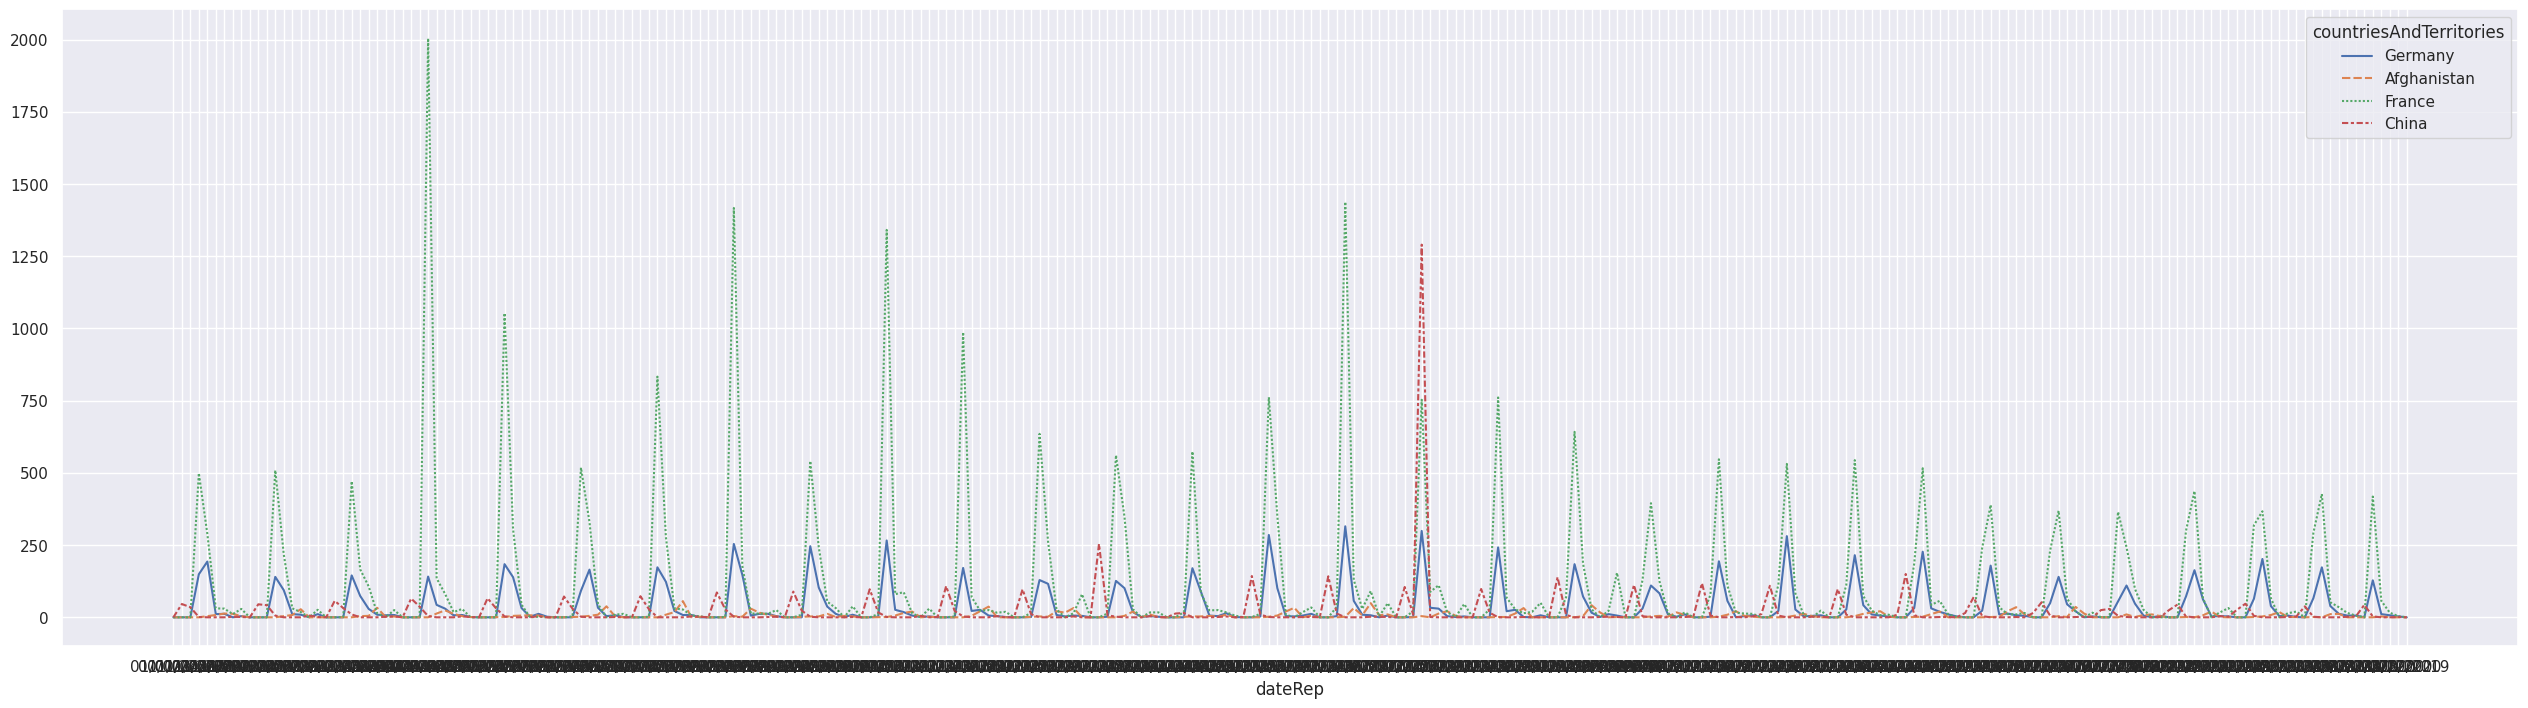

In [32]:
sns.set(rc={'figure.figsize':(31.7,8.27)})
sns.lineplot(data=covingDeathsWideFormatDataFrame[['Germany','Afghanistan','France','China']])

<Axes: xlabel='dateRep'>

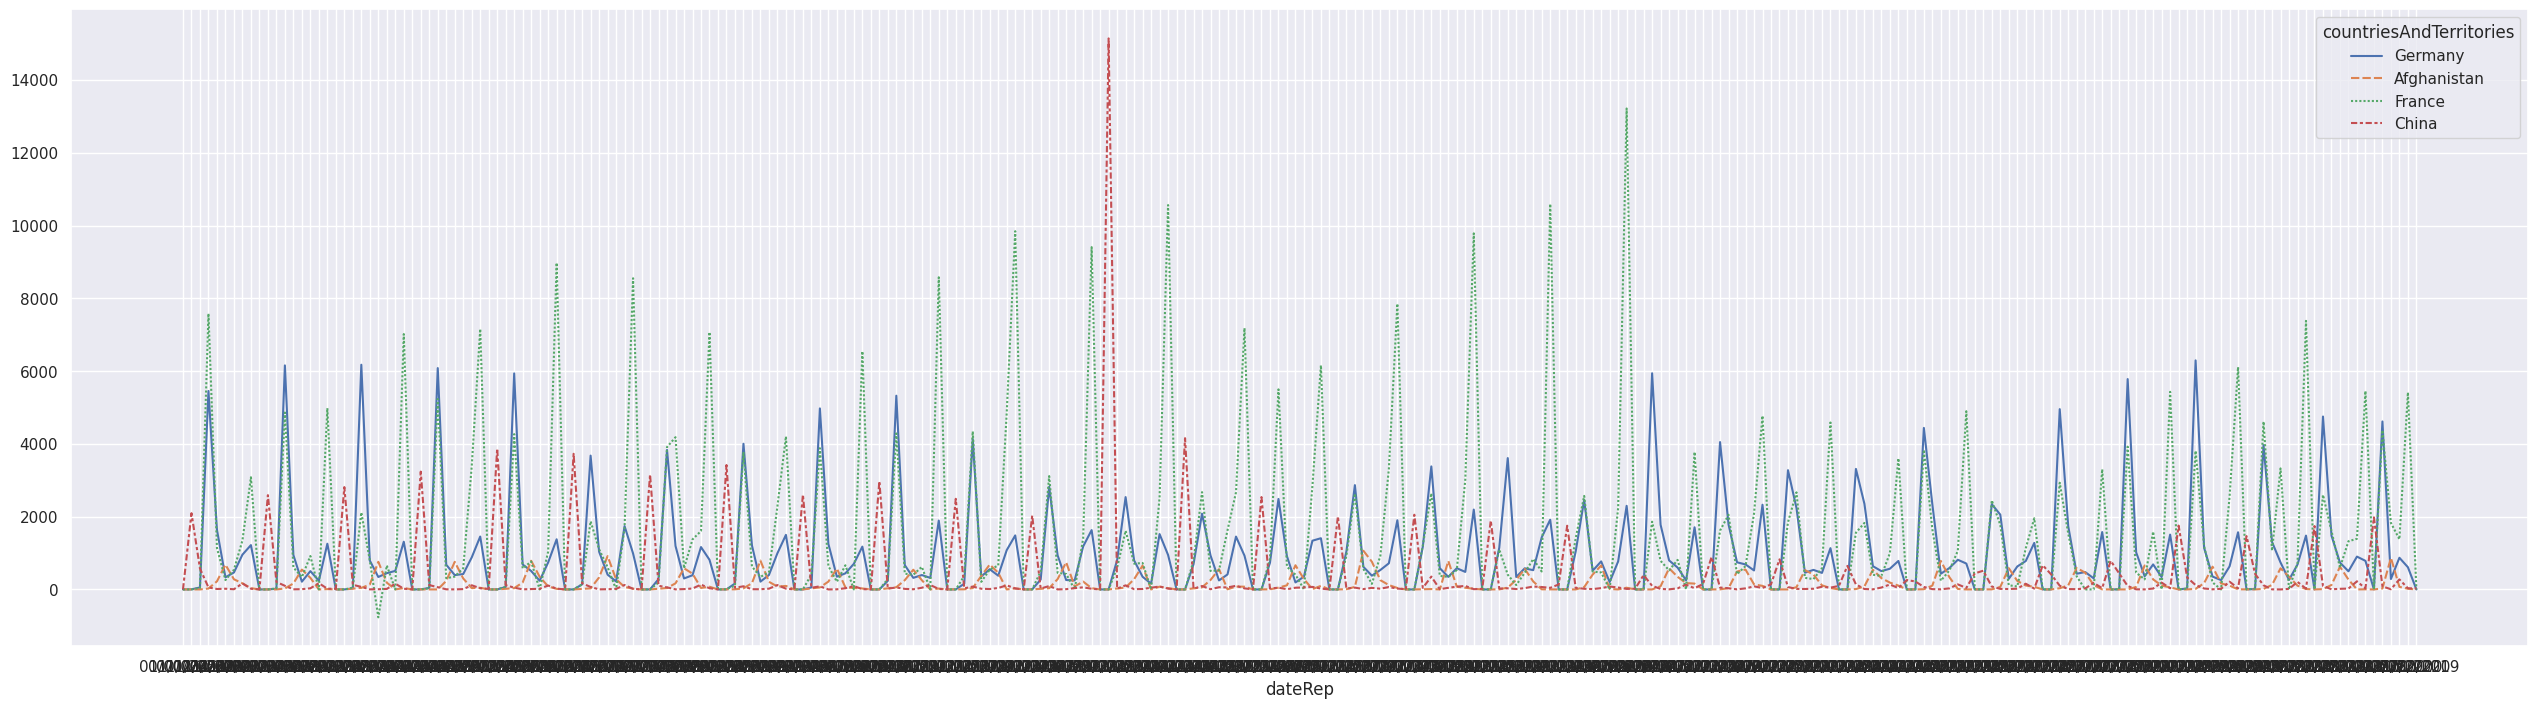

In [33]:
sns.set(rc={'figure.figsize':(31.7,8.27)})
sns.lineplot(data=covingCasesWideFormatDataFrame[['Germany','Afghanistan','France','China']])

## 4.2. Correlations

In [34]:
covingWideFormatDataFrameMultiIndex

cases                                          \
countriesAndTerritories Afghanistan Albania Algeria Andorra Angola Anguilla   
dateRep                                                                       
01/01/2020                      0.0     NaN     0.0     NaN    NaN      NaN   
01/02/2020                      0.0     NaN     0.0     NaN    NaN      NaN   
01/03/2020                      0.0     NaN     2.0     NaN    NaN      NaN   
01/04/2020                     25.0    20.0   132.0     6.0    0.0      0.0   
01/05/2020                    222.0     7.0   158.0     2.0    0.0      0.0   
...                             ...     ...     ...     ...    ...      ...   
31/03/2020                     27.0    11.0    73.0    36.0    0.0      0.0   
31/05/2020                    866.0    23.0   133.0     0.0    7.0      0.0   
31/07/2020                     71.0    92.0   602.0     4.0   78.0      0.0   
31/08/2020                     19.0   101.0   364.0     0.0   73.0      0.0   
31/12/2019                      0.0     NaN     0.0     NaN    NaN      NaN   

                                                                     ...  \
countriesAndTerritories Antigua_and_Barbuda Argentina Armenia Aruba  ...   
dateRep                                                              ...   
01/01/2020                              NaN       NaN     0.0   NaN  ...   
01/02/2020                              NaN       NaN     0.0   NaN  ...   
01/03/2020                              NaN       NaN     1.0   NaN  ...   
01/04/2020                              0.0       0.0    39.0   5.0  ...   
01/05/2020                              0.0     143.0    82.0   0.0  ...   
...                                     ...       ...     ...   ...  ...   
31/03/2020                              0.0     146.0    50.0   NaN  ...   
31/05/2020                              0.0     795.0   355.0   0.0  ...   
31/07/2020                              0.0    5641.0   354.0   1.0  ...   
31/08/2020                              0.0    9217.0   124.0  22.0  ...   
31/12/2019                              NaN       NaN     0.0   NaN  ...   

                                              deaths                           \
countriesAndTerritories United_States_Virgin_Islands United_States_of_America   
dateRep                                                                         
01/01/2020                                       NaN                      0.0   
01/02/2020                                       NaN                      0.0   
01/03/2020                                       NaN                      1.0   
01/04/2020                                       0.0                    909.0   
01/05/2020                                       0.0                   2040.0   
...                                              ...                      ...   
31/03/2020                                       NaN                    661.0   
31/05/2020                                       0.0                    945.0   
31/07/2020                                       0.0                   1357.0   
31/08/2020                                       0.0                    290.0   
31/12/2019                                       NaN                      0.0   

                                                                             \
countriesAndTerritories Uruguay Uzbekistan Venezuela Vietnam Western_Sahara   
dateRep                                                                       
01/01/2020                  NaN        NaN       NaN     0.0            NaN   
01/02/2020                  NaN        NaN       NaN     0.0            NaN   
01/03/2020                  NaN        NaN       NaN     0.0            NaN   
01/04/2020                  0.0        0.0       0.0     0.0            NaN   
01/05/2020                  2.0        0.0       0.0     0.0            0.0   
...                         ...        ...       ...     ...            ...   
31/03/2020  

In [35]:
corr=covingDeathsWideFormatDataFrame[['Mexico','Brazil','France','Spain','United_Kingdom','United_States_of_America']].corr()

<Axes: xlabel='countriesAndTerritories', ylabel='countriesAndTerritories'>

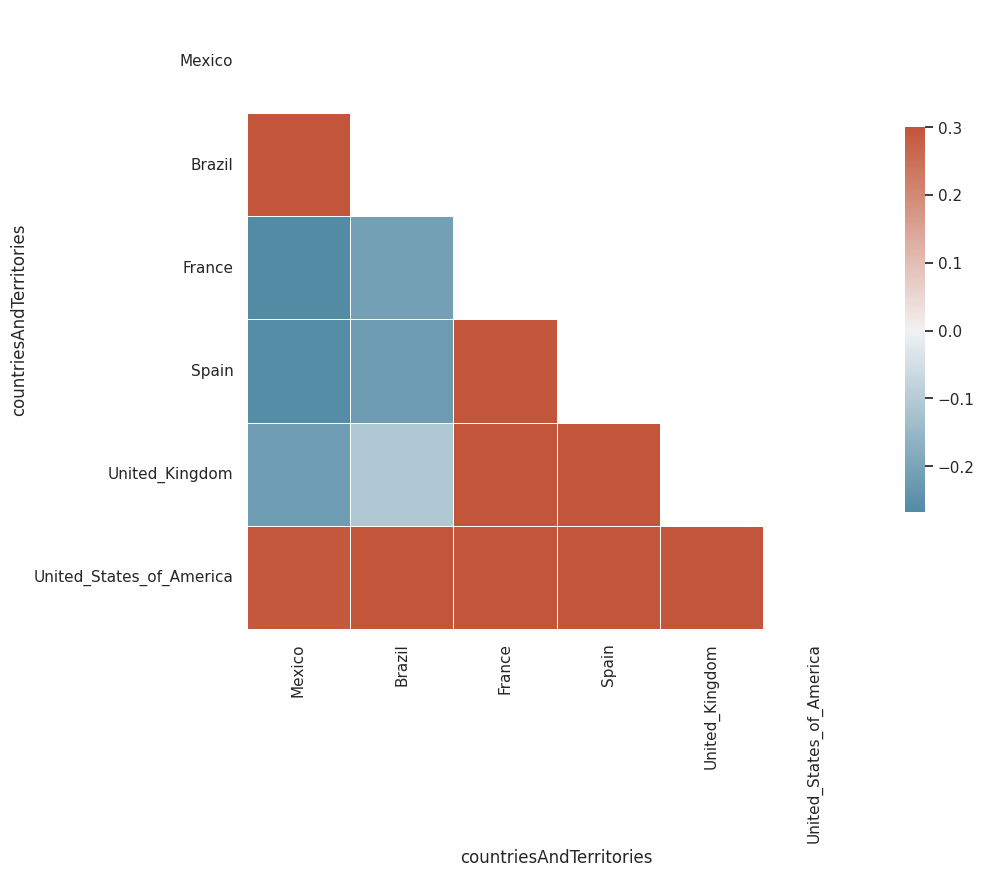

In [36]:
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})